# Project : Wrangle and Analyze Data

##### By Vaibhav Khobragade

### Data wrangling, which consists of:
- Gathering data (downloadable file in the Resources tab in the left most panel of your classroom and linked in step 1 below).
- Assessing data
- Cleaning data
- Storing, analyzing, and visualizing your wrangled data
- Reporting on 1) your data wrangling efforts and 2) your data analyses and visualizations

## Table of Contents:
***1) Gathering Data:***
    * Twitter Archive Files
    * Twitter Image Prediction
    * Twitter API
***2) Assessing Data:***
    * Assessing Twitter Data:
        - Quality Issue
        - Tidiness Issue
    * Assessing Twitter Image Prediction
        - Quality Issue
        - Tidiness Issue
    * Assessing Twitter API
        - Quality Issue
        - Tidiness Issue
***3) Cleaning Data***

***4) Storing and Visualization***

***5) Conclusion***


## Introduction
<blockquote>This project The dataset that I will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.</blockquote>

In [1]:
# https://seaborn.pydata.org/tutorial/aesthetics.html#seaborn-figure-styles

In [2]:
# Importing relevent liberaries
import pandas as pd
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import re
from functools import reduce

import seaborn as sns
sns.set_style("whitegrid")

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
# Downloading the files of image predictuion.tsv by programmatically
# url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# response = requests.get(url)

# with open(url.split('/')[-1], mode='wb') as file:
#     file.write(response.content)

In [5]:
df_image_prediction = pd.read_csv('image-predictions.tsv', sep='\t')
df_image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
# Gather data through twitter API
# consumer_key = 'XXXXXXXXXXXXXXXX'
# consumer_secret = 'XXXXXXXXXXXXXXXX'
# access_token = 'XXXXXXXXXXXXXXXXXXXXX'
# access_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXX'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [7]:
# https://stackoverflow.com/questions/19704998/what-does-the-json-function-do-and-what-library-is-it-from

# tweet_ids = list(df_archive.tweet_id)
# # tweet_ids = tweet_id

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# twitter_data = {}
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
# for tweet_id in tweet_ids:
#     try:
#         tweet = api.get_status(tweet_id, tweet_mode='extended')
#         twitter_data[str(tweet_id)] = tweet._json
#     except tweepy.TweepError as e:
#         fails_dict[tweet_id] = e
#         print("Fail", fails_dict, "\n")
# end = timer()
# print(end - start)

In [8]:
# Qucik Sanity check 
twitter_data['666033412701032449']

In [9]:
twitter_data['666033412701032449']['extended_entities']['media'][0]['media_url']

In [10]:
# 2331 twitter_id data gather
len(twitter_data)

In [11]:
type(twitter_data)

#### Now, you can clearly see what details you needed for the making DataFrame. I choose Following:-
- id,retweet_count, favorite_count, followers_count, friends_count.

In [12]:
# Writing the JSON file
# with open('tweet_json.txt', 'w') as file:
#     json.dump(twitter_data, file, indent=2)

In [13]:
# Reading the JSON file 
with open('tweet_json.txt', 'r') as file:
    twitter_json = json.load(file)

In [14]:
twitter_data_list = []
for twitter_id in twitter_json.keys():
    retweets = twitter_json[str(twitter_id)]['retweet_count']
    favorites = twitter_json[str(twitter_id)]['favorite_count']
    followers = twitter_json[str(twitter_id)]['user']['followers_count']
    friends = twitter_json[str(twitter_id)]['user']['friends_count']

    # I am going to append into the list
    twitter_data_list.append({
        'tweet_id': twitter_id,
        'retweets': retweets,
        'favorites': favorites,
        'followers': followers,
        'friends': friends
    })

In [15]:
# Making Dataframe from the list
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.from_records.html#pandas.DataFrame.from_records

df_twitter_api = pd.DataFrame.from_records(twitter_data_list, columns=['tweet_id', 'retweets', 'favorites', 'followers', 'friends'])
df_twitter_api.head()

,tweet_id,retweets,favorites,followers,friends
0,892420643555336193,7598,35866,8821171,17
1,892177421306343426,5627,30940,8821171,17
2,891815181378084864,3724,23287,8821171,17
3,891689557279858688,7778,39138,8821171,17
4,891327558926688256,8374,37385,8821171,17


In [16]:
df_twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
tweet_id     2331 non-null object
retweets     2331 non-null int64
favorites    2331 non-null int64
followers    2331 non-null int64
friends      2331 non-null int64
dtypes: int64(4), object(1)
memory usage: 91.1+ KB


### Assessing Data
After gathering each of the above pieces of data from theree different files, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issue

In [17]:
df_archive.shape

(2356, 17)

In [18]:
df_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

Twitter Dictionary information found from Social Feeding Manager(SFM) [Doc](https://sfm.readthedocs.io/en/2.3.0/data_dictionary.html)

`df_archive` columns:
- **tweet_id**: Twitter identifier for the tweet
- **in_reply_to_status_id**: If tweet is a reply, the Twitter identifier of the tweet that is being replied to.
- **in_reply_to_user_id**: If tweet is a reply, the Twitter identifier of the author of the tweet that is being replied to.
- **timestamp**: Date and time the tweet was created, in Twitter’s default format.
- **source**: The application from which the tweet was posted.
- **text**: The text of the tweet. Newline characters are replaced with a space.
- **retweeted_status_id**: retweeted to the status_id
- **retweeted_status_user_id**: retweeted to the status_id with repsect to specific user_id
- **retweeted_status_timestamp**: timestamp of retweeted
- **expanded_urls**: we have 634 records that more than one links URLs link of tweet.
- **rating_numerator**: rating given by user.
- **rating_denominator**: out of rating 
- **name**: name of the dog 
- **doggo**: stage of the dog
- **floofer**: stage of the dog
- **pupper**: stage of the dog
- **puppo**: stage of the dog

In [19]:
df_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1320,706346369204748288,NaN,NaN,2016-03-06 05:11:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. She's a Beneboom Cumberwiggle. 1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706346369...,12,10,Koda,None,None,None,None
768,777621514455814149,NaN,NaN,2016-09-18 21:33:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Derek. You can't look at him and not s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/777621514...,12,10,Derek,None,None,None,None
530,808134635716833280,NaN,NaN,2016-12-12 02:21:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Milo. I would do terrib...,8.011679e+17,4.196984e+09,2016-11-22 20:58:07 +0000,https://twitter.com/dog_rates/status/801167903...,13,10,Milo,None,None,None,None
2150,669683899023405056,NaN,NaN,2015-11-26 01:07:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kloey. Her mother was a unicorn. 10/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669683899...,10,10,Kloey,None,None,None,None
1465,694352839993344000,NaN,NaN,2016-02-02 02:53:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Oliviér. He takes killer selfies. Has a d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694352839...,10,10,Oliviér,None,None,None,None


In [20]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [21]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [22]:
df_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [23]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [24]:
# Finding the duplicate by tweet_id then sort it
df_archive[df_archive['tweet_id'].duplicated(keep=False)].sort_values(by=['tweet_id'])

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [25]:
df_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [26]:
# checking numberator rating
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [27]:
df_archive[df_archive['rating_numerator'] == 1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Not familiar with this breed. N...,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
1446,696490539101908992,6.964887e+17,4.196984e+09,2016-02-08 00:27:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After reading the comments I may have overesti...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
1869,675153376133427200,NaN,NaN,2015-12-11 03:21:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What kind of person sends in a picture without...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675153376...,1,10,None,None,None,None,None
1940,673716320723169284,6.737159e+17,4.196984e+09,2015-12-07 04:11:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The millennials have spoken and we've decided ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2091,670783437142401025,NaN,NaN,2015-11-29 01:56:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Flamboyant pup here. Probably poisonous. Won't...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670783437...,1,10,None,None,None,None,None
2261,667549055577362432,NaN,NaN,2015-11-20 03:44:31 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Never seen dog like this. Breathes heavy. Tilt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667549055...,1,10,None,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None
2338,666104133288665088,NaN,NaN,2015-11-16 04:02:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Not familiar with this breed. No tail (weird)....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None


In [28]:
low_rating = df_archive.query("rating_numerator < 2").index
for num_rating in low_rating:
    print(num_rating, ",", df_archive.at[num_rating, 'text'])
    print(" ")


315 , When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
 
605 , RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…
 
1016 , PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX
 
1446 , After reading the comments I may have overestimated this pup. Downgraded to a 1/10. Please forgive me
 
1869 , What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0
 
1940 , The millennials have spoken and we've decided to immediately demote to a 1/10. Thank you
 
2038 , After 22 minutes of careful deliberation this dog is being demoted to a 1/10. The longer you look at him the more terrifying he becomes
 
2091 , Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting doesn't look fun. 

In [29]:
# For the higher rating in the numerator
low_rating = df_archive.query("rating_numerator > 20").index
for num_rating in low_rating:
    print(num_rating, ",", df_archive.at[num_rating, 'text'])
    print(" ")


188 , @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
 
189 , @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
 
290 , @markhoppus 182/10
 
313 , @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
 
340 , RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
 
433 , The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
 
516 , Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
 
695 , This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
 
763 , This is Sophie. She's a Jubilant Bush Pupper. Super h

In [30]:
print(df_archive.iloc[340])
print('\n')
print(df_archive.iloc[695])
print('\n')
print(df_archive.iloc[763])
print('\n')
print(df_archive.iloc[1712])

tweet_id                                                     832215909146226688
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-02-16 13:11:49 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          RT @dog_rates: This is Logan, the Chow who liv...
retweeted_status_id                                                 7.86709e+17
retweeted_status_user_id                                            4.19698e+09
retweeted_status_timestamp                            2016-10-13 23:23:56 +0000
expanded_urls                 https://twitter.com/dog_rates/status/786709082...
rating_numerator                                                             75
rating_denominator                                                           10
name                                    

In [31]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [32]:
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [33]:
df_archive[df_archive['rating_numerator'] == 1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Not familiar with this breed. N...,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
1446,696490539101908992,6.964887e+17,4.196984e+09,2016-02-08 00:27:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After reading the comments I may have overesti...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
1869,675153376133427200,NaN,NaN,2015-12-11 03:21:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What kind of person sends in a picture without...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675153376...,1,10,None,None,None,None,None
1940,673716320723169284,6.737159e+17,4.196984e+09,2015-12-07 04:11:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The millennials have spoken and we've decided ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2091,670783437142401025,NaN,NaN,2015-11-29 01:56:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Flamboyant pup here. Probably poisonous. Won't...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670783437...,1,10,None,None,None,None,None
2261,667549055577362432,NaN,NaN,2015-11-20 03:44:31 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Never seen dog like this. Breathes heavy. Tilt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667549055...,1,10,None,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None
2338,666104133288665088,NaN,NaN,2015-11-16 04:02:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Not familiar with this breed. No tail (weird)....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None


In [34]:
low_rating = df_archive.query("rating_denominator < 2").index
for num_rating in low_rating:
    print(num_rating, ",", df_archive.at[num_rating, 'text'])
    print(" ")

313 , @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
 


In [35]:
low_rating = df_archive.query("rating_denominator > 10").index
for num_rating in low_rating:
    print(num_rating, ",", df_archive.at[num_rating, 'text'])
    print(" ")

342 , @docmisterio account started on 11/15/15
 
433 , The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
 
784 , RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
 
902 , Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
 
1068 , After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
 
1120 , Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
 
1165 , Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
 
1202 , This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
 
1228 , Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
 
1254 , Here's a brigad

In [36]:
df_archive.name.value_counts().sort_values(ascending=False)

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
Lucy        11
Tucker      10
Lola        10
Penny       10
Bo           9
Winston      9
Sadie        8
the          8
Daisy        7
Toby         7
Bailey       7
an           7
Buddy        7
Stanley      6
Jack         6
Rusty        6
Scout        6
Leo          6
Koda         6
Bella        6
Jax          6
Dave         6
Milo         6
Oscar        6
Finn         5
          ... 
Swagger      1
Lilli        1
Kloey        1
Tommy        1
Mac          1
Ronduh       1
Bilbo        1
Simba        1
Fwed         1
Brat         1
Mimosa       1
Travis       1
Kaiya        1
Tebow        1
Jaspers      1
Chase        1
Harvey       1
Zooey        1
Dutch        1
Jim          1
Stella       1
Cecil        1
Kevon        1
Hector       1
Mutt         1
Tove         1
Horace       1
Brudge       1
Petrick      1
Bronte       1
Name: name, Length: 957, dtype: int64

Dog `name` looks bit suspicious, So I would like to take deeper look

In [37]:
df_archive['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [38]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [39]:
# https://stackoverflow.com/questions/25351968/how-to-display-full-non-truncated-dataframe-information-in-html-when-convertin
pd.set_option('display.max_colwidth', -1)
df_archive['expanded_urls'].sample(10)

57      https://twitter.com/dog_rates/status/881268444196462592/photo/1                                                                                                                                                                                                
1700    https://twitter.com/dog_rates/status/680959110691590145/photo/1,https://twitter.com/dog_rates/status/680959110691590145/photo/1,https://twitter.com/dog_rates/status/680959110691590145/photo/1                                                                
1598    NaN                                                                                                                                                                                                                                                            
449     https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://

In [40]:
# https://stackoverflow.com/questions/37335598/how-to-get-the-length-of-a-cell-value-in-pandas-dataframe
# str.len() function measured length of string
df_archive[df_archive['expanded_urls'].str.len() > 63]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Koda. He is a South Australian deckshark. Deceptively deadly. Frighteningly majestic. 13/10 would risk a petting #BarkWeek https://t.co/dVPW0B0Mme,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890006608113172480/photo/1,https://twitter.com/dog_rates/status/890006608113172480/photo/1",13,10,Koda,None,None,None,None
13,889638837579907072,NaN,NaN,2017-07-25 00:10:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Ted. He does his best. Sometimes that's not enough. But it's ok. 12/10 would assist https://t.co/f8dEDcrKSR,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/889638837579907072/photo/1,https://twitter.com/dog_rates/status/889638837579907072/photo/1",12,10,Ted,None,None,None,None
17,888804989199671297,NaN,NaN,2017-07-22 16:56:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zeke. He has a new stick. Very proud of it. Would like you to throw it for him without taking it. 13/10 would do my best https://t.co/HTQ77yNQ5K,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/888804989199671297/photo/1,https://twitter.com/dog_rates/status/888804989199671297/photo/1",13,10,Zeke,None,None,None,None
18,888554962724278272,NaN,NaN,2017-07-22 00:23:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Ralphus. He's powering up. Attempting maximum borkdrive. 13/10 inspirational af https://t.co/YnYAFCTTiK,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/888554962724278272/photo/1,https://twitter.com/dog_rates/status/888554962724278272/photo/1,https://twitter.com/dog_rates/status/888554962724278272/photo/1,https://twitter.com/dog_rates/status/888554962724278272/photo/1",13,10,Ralphus,None,None,None,None
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/do

#### Quality Issues:
`df_archive` table
1. There are lots of missing values in theses columns **in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp** 
2. **Source** column subsume anchor tag.
3. **Timestamp** column datatype should be datetime instead string(object)
4. **rating_numerator** should be float instead integer
5. **rating_numerator** falsely taken in these index(340, 695, 763, 1712) should be replace with 9.75, 9.75, 11.27, 11.26.
6. **name** mistakenly print such as **a, bo, an, the, by, my, Brat, O', very, BeBe, one Mo life Dot Lolo, this, all, old, such, not, Mister, Doc, just, Jo, Amélie, Bobb, CeCe, his, mad, Pip, space, officially, Rascal, Buddah, Django, light.**
7. **rating_numerator** and **rating_denominator** isn't valid rating for index 313
8. **expanded_urls** In 634 records have multiple links 
9. Expanding the size of the datasets for clearity of the columns text

#### Tidiness Issues: 
1. We have found same columns more than one dataframe. So need to combined them deleting duplicated columns.
2. Dog Stage 'doggo, floofer, pupper, puppo' have to combine into single column as dog_stage 

In [41]:
df_image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


`df_image_prediction` table
- **tweet_id:** Twitter identifier for the tweet that has been taken from tweet URL after "status/" →
- **jpg_url:** image url 
- **img_num:** is the number prediction for the image in the tweet
- **p1:** is the algorithm's #1 prediction for the image in the tweet → golden retriever
- **p1_config:**  is how confident the algorithm is in its #1 prediction → 95%
- **p1_dog:** is whether or not the #1 prediction is a breed of dog → TRUE.
- **p2:** is the algorithm's second most likely prediction → Labrador retriever
- **p2_conf:** is how confident the algorithm is in its #2 prediction → 1%
- **p2_dog:** is whether or not the #2 prediction is a breed of dog → TRUE
- **p3:** is the algorithm's second most likely prediction → Pembroke
- **p3_conf:** is how confident the algorithm is in its #3 prediction → 1%
- **p3_dog:** is whether or not the #3 prediction is a breed of dog → TRUE

In [42]:
df_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [43]:
df_image_prediction.tweet_id.duplicated().sum()

0

In [44]:
df_image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [45]:
df_image_prediction.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [46]:
df_image_prediction.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [47]:
df_image_prediction.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                     89 
Chihuahua                    83 
pug                          57 
chow                         44 
Samoyed                      43 
toy_poodle                   39 
Pomeranian                   38 
cocker_spaniel               30 
malamute                     30 
French_bulldog               26 
miniature_pinscher           23 
Chesapeake_Bay_retriever     23 
seat_belt                    22 
Siberian_husky               20 
German_shepherd              20 
Staffordshire_bullterrier    20 
web_site                     19 
Cardigan                     19 
beagle                       18 
Shetland_sheepdog            18 
Eskimo_dog                   18 
Maltese_dog                  18 
teddy                        18 
Lakeland_terrier             17 
Shih-Tzu                     17 
Rottweiler                   17 
Italian_greyhound            16 
kuvasz                       16 
          

In [48]:
df_image_prediction.img_num.value_counts()

1    1780
2    198 
3    66  
4    31  
Name: img_num, dtype: int64

In [49]:
df_image_prediction.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
cocker_spaniel                    31
beagle                            31
Pekinese                          29
Pomeranian                        29
toy_poodle                        29
Chesapeake_Bay_retriever          27
Pembroke                          27
Great_Pyrenees                    27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
L

#### Quality:-
`df_image_prediction` table
- We have data 2075 total images with respective with thier tweed_id. So 281 images are not avaliable for the df_archive

#### Tidiness:- 
- We found relevent records that tweet_id match with df_archive dataframe. So we have to combine the dataset with df_archive.

In [50]:
df_twitter_api.head()

,tweet_id,retweets,favorites,followers,friends
0,892420643555336193,7598,35866,8821171,17
1,892177421306343426,5627,30940,8821171,17
2,891815181378084864,3724,23287,8821171,17
3,891689557279858688,7778,39138,8821171,17
4,891327558926688256,8374,37385,8821171,17


In [51]:
df_twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
tweet_id     2331 non-null object
retweets     2331 non-null int64
favorites    2331 non-null int64
followers    2331 non-null int64
friends      2331 non-null int64
dtypes: int64(4), object(1)
memory usage: 91.1+ KB


In [52]:
df_twitter_api.duplicated().sum()

0

In [53]:
df_twitter_api.describe()

,retweets,favorites,followers,friends
count,2331.000000,2331.000000,2.331000e+03,2331.0
mean,2670.346203,7489.536251,8.821193e+06,17.0
std,4515.888620,11626.067934,6.745219e+01,0.0
min,1.000000,0.000000,8.821171e+06,17.0
25%,541.000000,1302.500000,8.821173e+06,17.0
50%,1249.000000,3256.000000,8.821190e+06,17.0
75%,3104.500000,9170.500000,8.821191e+06,17.0
max,76771.000000,154554.000000,8.821846e+06,17.0


In [54]:
df_twitter_api.followers.value_counts()

8821191    541
8821202    535
8821172    276
8821173    184
8821171    173
8821188    166
8821175    134
8821190    105
8821174    102
8821189    39 
8821187    35 
8821203    16 
8821835    9  
8821846    5  
8821816    3  
8821819    3  
8821834    2  
8821815    1  
8821817    1  
8821832    1  
Name: followers, dtype: int64

#### Quality issue:-
`df_twitter_api` table
- we haven't got records for 25 tweet_id from api.

#### Tidiness issue:-
- We have to combine this dataframe with df_archive dataframe.

### Cleaning Data

#### Define: 
copy the df_archive dataframe

##### Code:

In [55]:
df_clean_archive = df_archive.copy()

#### Test:

In [56]:
df_clean_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
349,831650051525054464,NaN,NaN,2017-02-14 23:43:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I usually only share these on Friday's, but this is Blue. He's a very smoochable pooch who needs your help. 13/10\n\nhttps://t.co/piiX0ke8Z6 https://t.co/1UHrKcaCiO",NaN,NaN,NaN,"http://www.gofundme.com/bluethewhitehusky,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1",13,10,None,None,None,None,None
204,852936405516943360,NaN,NaN,2017-04-14 17:27:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: I usually only share these on Friday's, but this is Blue. He's a very smoochable pooch who needs your help. 13/10\n\nhttps://t…",8.316501e+17,4.196984e+09,2017-02-14 23:43:18 +0000,"http://www.gofundme.com/bluethewhitehusky,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1",13,10,None,None,None,None,None
2338,666104133288665088,NaN,NaN,2015-11-16 04:02:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666104133288665088/photo/1,1,10,None,None,None,None,None
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133288665088/photo/1,1,10,None,None,None,None,None
2294,667138269671505920,NaN,NaN,2015-11-19 00:32:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Extremely intelligent dog here. Has learned to walk like human. Even has his own dog. Very impressive 10/10 https://t.co/0DvHAMdA4V,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667138269671505920/photo/1,10,10,None,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Extremely intelligent dog here. Has learned to walk like human. Even has his own dog. Very impressive 10/10 https://t.co/0Dv…,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269671505920/photo/1,10,10,None,None,None,None,None
273,840728873075638272,NaN,NaN,2017-03-12 00:59:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Pipsy. He is a fluffball. Enjoys traveling the sea &amp; getting tangled in leash. 12/10 I would kill for Pipsy https://…,6.671522e+17,4.196984e+09,2015-11-19 01:27:25 +0000,https://twitter.com/dog_rates/status/667152164079423490/photo/1,12,10,Pipsy,None,None,None,None
2293,667152164079423490,NaN,NaN,2015-11-19 01:27:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pipsy. He is a fluffball. Enjoys traveling the sea &amp; getting tangled in leash. 12/10 I would kill for Pipsy https://t.co/h9R0EwKd9X,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667152164079423490/ph

In [58]:
df_clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### Define:
we are going to drop irrelevent columns `in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp`

#### Code: 

In [59]:
df_clean_archive = df_clean_archive.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

#### Test:

In [60]:
df_clean_archive.shape

(2356, 12)

In [61]:
df_clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


#### Define:
We are going to clean those duplicated url link contain in the `expanded_urls` column

#### Code:

In [62]:
df_clean_archive['expanded_urls'].str.len().describe()

count    2297.000000
mean     91.838485  
std      61.005858  
min      29.000000  
25%      63.000000  
50%      63.000000  
75%      127.000000 
max      511.000000 
Name: expanded_urls, dtype: float64

In [63]:
# We are capturing the link  that length is more than 63
df_urls = df_clean_archive[df_clean_archive['expanded_urls'].str.len() > 63]
df_urls_dup = df_urls.copy()

In [64]:
# Split by commas and captured 634 records link.
df_urls_dup['expanded_urls'] = df_urls_dup['expanded_urls'].str.split(",", n=3, expand=True)[0]

In [65]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.combine_first.html#pandas.DataFrame.combine_first
df_clean_archive = df_urls_dup.combine_first(df_clean_archive)
df_clean_archive['tweet_id'] = df_clean_archive['tweet_id'].astype(int)

#### Test:

In [ ]:
# Analysis of the duplicate link why it is
df_clean_archive[df_clean_archive['expanded_urls'].duplicated(keep=False)].sort_values(by=['expanded_urls'])

In [66]:
# Here some duplicated because retweeted associated with same image urls and some are NaN values
df_clean_archive['expanded_urls'].duplicated().sum()

203

In [67]:
df_clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null float64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 239.3+ KB


In [68]:
df_clean_archive

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336192,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,None,None,None,None
1,892177421306343424,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",https://twitter.com/dog_rates/status/891327558926688256/photo/1,12.0,10.0,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,None,None,None,None,None
6,890971913173991424,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,https://gofundme.com/ydvmve-surgery-for-jax,13.0,10.0,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,https://twitter.com/dog_rates/status/890729181411237888/photo/1,13.0,10.0,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13.0,10.0,Zoey,None,None,None,None
9,890240255349198848,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14.0,10.0,Cassie,doggo,None,None,None


#### Define:
Removing the **anchor tag** from source column from `df_clean_archive` dataframe

#### Code:

In [69]:
# We are using regex to extracting specific text
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extract.html
df_clean_archive['source'] = df_clean_archive['source'].str.extract(r'(Twitter\s\w+\s\w+)')

#### Test

In [70]:
df_clean_archive.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336192,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,None,None,None,None
1,892177421306343424,2017-08-01 00:17:27 +0000,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",https://twitter.com/dog_rates/status/891327558926688256/photo/1,12.0,10.0,Franklin,None,None,None,None


In [71]:
df_clean_archive['source'].value_counts()

Twitter for iPhone    2221
Twitter Web Client    33  
Name: source, dtype: int64

#### Define:
- We converting timestamp column string datatype into the datetime datatype. 

#### Code:

In [72]:
# To datetime
df_clean_archive.timestamp = pd.to_datetime(df_clean_archive.timestamp)

#### Test:

In [73]:
df_clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2254 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null float64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 239.3+ KB


#### Define:

- The name mistakenly print in name columns such as `a, bo, an, the, by, my, very, one, life, this, all, old, such, not, just, his, mad, space, officially, light.`
- We give a general name as `anonymous` to all those missprint name

Let's check first all the possible name whether it is correct or not from the text.

#### Code:

In [74]:
# expanding the columns width
pd.set_option('max_colwidth', 500)

In [75]:
len(df_clean_archive[df_clean_archive.name == 'a'])

55

In [76]:
df_clean_archive[df_clean_archive.name == 'officially']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1747,679111216690831360,2015-12-22 01:28:25,Twitter for iPhone,This is officially the greatest yawn of all time. 12/10 https://t.co/4R0Cc0sLVE,https://twitter.com/dog_rates/status/679111216690831360/video/1,12.0,10.0,officially,None,None,None,None


In [77]:
dog_names = ['a', 'bo', 'an', 'the', 'by', 'my', 'very', 'one', 'life', 'this', 'all', 'old', 'such', 'not', 'just', 'his', 'mad', 'space', 'officially', 'light']
count = 0
# index_vals = []
for word in df_clean_archive['name']:
    if word in dog_names:
        count +=1
        print('True')
        print(count)

True
1
True
2
True
3
True
4
True
5
True
6
True
7
True
8
True
9
True
10
True
11
True
12
True
13
True
14
True
15
True
16
True
17
True
18
True
19
True
20
True
21
True
22
True
23
True
24
True
25
True
26
True
27
True
28
True
29
True
30
True
31
True
32
True
33
True
34
True
35
True
36
True
37
True
38
True
39
True
40
True
41
True
42
True
43
True
44
True
45
True
46
True
47
True
48
True
49
True
50
True
51
True
52
True
53
True
54
True
55
True
56
True
57
True
58
True
59
True
60
True
61
True
62
True
63
True
64
True
65
True
66
True
67
True
68
True
69
True
70
True
71
True
72
True
73
True
74
True
75
True
76
True
77
True
78
True
79
True
80
True
81
True
82
True
83
True
84
True
85
True
86
True
87
True
88
True
89
True
90
True
91
True
92
True
93
True
94
True
95
True
96
True
97
True
98


In [78]:
# count = 0
# index_vals = []
for word in dog_names:
    print(df_clean_archive.name[df_clean_archive['name'] == word].index)

Int64Index([  56,  649,  801, 1002, 1004, 1017, 1049, 1193, 1207, 1340, 1351,
            1361, 1368, 1382, 1499, 1737, 1785, 1853, 1854, 1877, 1878, 1923,
            1941, 1955, 1994, 2034, 2066, 2116, 2125, 2128, 2146, 2153, 2161,
            2191, 2198, 2211, 2218, 2222, 2235, 2249, 2255, 2264, 2273, 2287,
            2304, 2311, 2314, 2327, 2334, 2347, 2348, 2350, 2352, 2353, 2354],
           dtype='int64')
Int64Index([], dtype='int64')
Int64Index([759, 1025, 1362, 2204, 2333, 2335, 2349], dtype='int64')
Int64Index([1527, 1603, 1797, 1815, 2037, 2212, 2345, 2346], dtype='int64')
Int64Index([1724], dtype='int64')
Int64Index([852], dtype='int64')
Int64Index([773, 819, 1031, 1097, 1385], dtype='int64')
Int64Index([369, 924, 993, 1936], dtype='int64')
Int64Index([1916], dtype='int64')
Int64Index([1120], dtype='int64')
Int64Index([1138], dtype='int64')
Int64Index([1206], dtype='int64')
Int64Index([22], dtype='int64')
Int64Index([335, 988], dtype='int64')
Int64Index([822, 1063, 1457, 2

In [79]:
lst_ind = [56,  649,  801, 1002, 1004, 1017, 1049, 1193, 1207, 1340, 1351,
           1361, 1368, 1382, 1499, 1737, 1785, 1853, 1854, 1877, 1878, 1923,
           1941, 1955, 1994, 2034, 2066, 2116, 2125, 2128, 2146, 2153, 2161,
           2191, 2198, 2211, 2218, 2222, 2235, 2249, 2255, 2264, 2273, 2287,
           2304, 2311, 2314, 2327, 2334, 2347, 2348, 2350, 2352, 2353, 2354, 
           759, 1025, 1362, 2204, 2333, 2335, 2349, 1527, 1603, 1797, 1815, 
           2037, 2212, 2345, 2346, 1724, 852, 773, 819, 1031, 1097, 1385, 
           369, 924, 993, 1936, 1916, 1120, 1138, 1206, 22, 335, 988, 822, 
           1063, 1457, 2019,992, 682, 1095, 2030, 1747, 2001]

for i in lst_ind:
    df_clean_archive.at[i, 'name'] = 'anonymous'  

In [80]:
df_clean_archive[df_clean_archive.name == 'anonymous']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,2017-07-19 03:39:09,Twitter for iPhone,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,https://twitter.com/dog_rates/status/887517139158093824/video/1,14.0,10.0,anonymous,None,None,None,None
56,881536004380872704,2017-07-02 15:32:16,Twitter for iPhone,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,https://twitter.com/dog_rates/status/881536004380872706/video/1,14.0,10.0,anonymous,None,None,pupper,None
335,832645525019123712,2017-02-17 17:38:57,Twitter Web Client,There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,http://us.blastingnews.com/news/2017/02/jfk-announces-its-first-ever-ark-oasis-animal-terminal-001480161.html?sbdht=_pM1QUzk3wsdTxcmMoRPV7FWYYlsNKcFRcYSY7OmeHnOXA4NtUM6PLQ2_,10.0,10.0,anonymous,None,None,None,None
369,828650029636317184,2017-02-06 17:02:17,Twitter for iPhone,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",https://twitter.com/dog_rates/status/828650029636317184/photo/1,14.0,10.0,anonymous,None,None,None,None
649,792913359805018112,2016-10-31 02:17:31,Twitter for iPhone,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,https://twitter.com/dog_rates/status/792913359805018113/photo/1,13.0,10.0,anonymous,None,None,None,None
682,788552643979468800,2016-10-19 01:29:35,Twitter for iPhone,RT @dog_rates: Say hello to mad pupper. You know what you did. 13/10 would pet until no longer furustrated https://t.co/u1ulQ5heLX,"https://vine.co/v/iEggaEOiLO3,https://vine.co/v/iEggaEOiLO3",13.0,10.0,anonymous,None,None,pupper,None
759,778396591732486144,2016-09-21 00:53:04,Twitter for iPhone,RT @dog_rates: This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10 https://t.co/iHe6liLwWR,https://twitter.com/dog_rates/status/703041949650034688/photo/1,10.0,10.0,anonymous,None,None,None,None
773,776249906839351296,2016-09-15 02:42:54,Twitter for iPhone,RT @dog_rates: We only rate dogs. Pls stop sending in non-canines like this Mongolian grass snake. This is very frustrating. 11/10 https://…,https://twitter.com/dog_rates/status/700747788515020802/photo/1,11.0,10.0,anonymous,None,None,None,None
801,772581559778025472,2016-09-04 23:46:12,Twitter for iPhone,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,https://twitter.com/dog_rates/status/772581559778025472/photo/1,10.0,10.0,anonymous,None,None,None,None
819,770655142660169728,2016-08-30 16:11:18,Twitter for iPhone,We only rate dogs. Pls stop sending in non-canines like this Arctic Floof Kangaroo. This is very frustrating. 11/10 https://t.co/qlUDuPoE3d,https://twitter.com/dog_rates/status/770655142660169732/photo/1,11.0,10.0,anonymous,None,None,None,None


#### Test:

In [81]:
# checking any name from the list in dataframe. if it is, it will return true. Ohterwise return nothing
for word in df_clean_archive['name']:
    if word in dog_names:
        print(true)

In [82]:
df_clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2254 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null float64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 319.3+ KB


#### Define:
- Issue you can see first we saw `rating_denominator and rating_numerator` columns datatype is int but now it is in float. So, still we want `rating_numerator` is in float and `rating_denominator` is in int.
- Let's do this.

#### Code:

In [83]:
# Datatype
df_clean_archive['rating_numerator'] = df_clean_archive['rating_numerator'].astype(float)
df_clean_archive['rating_denominator'] = df_clean_archive['rating_denominator'].astype(int)

#### Test:


In [84]:
df_clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2254 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 319.3+ KB


#### Define:

- rating_numerator falsely taken in these index(340, 695, 763, 1712) should be replace with 9.75, 9.75, 11.27, 11.26.

#### Code

In [85]:
rating_index = [340,695,763,1712]
print(df_clean_archive.at[340, 'rating_numerator'])
print(df_clean_archive.at[340, 'text'] )
print(df_clean_archive.at[695, 'rating_numerator'])
print(df_clean_archive.at[695, 'text'] )
print(df_clean_archive.at[763, 'rating_numerator'])
print(df_clean_archive.at[763, 'text'] )
print(df_clean_archive.at[1712, 'rating_numerator'])
print(df_clean_archive.at[1712, 'text'] )

75.0
RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
75.0
This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
27.0
This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
26.0
Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD


In [86]:
df_clean_archive.at[340, 'rating_numerator'] = 9.75
df_clean_archive.at[695, 'rating_numerator'] = 9.75
df_clean_archive.at[763, 'rating_numerator'] = 11.27
df_clean_archive.at[1712, 'rating_numerator'] = 11.26

#### Test:

In [87]:
print(df_clean_archive.at[340, 'rating_numerator'])
print(df_clean_archive.at[695, 'rating_numerator'])
print(df_clean_archive.at[763, 'rating_numerator'])
print(df_clean_archive.at[1712, 'rating_numerator'])

9.75
9.75
11.27
11.26


#### Define:
-  `rating_numerator` and `rating_denominator`. isn't valid rating for index 313
- We changing using .at method `rating_numerator` and `rating_denominator`.

#### Code:

In [88]:
print(df_clean_archive.at[313, 'rating_numerator'])
print(df_clean_archive.at[313, 'rating_denominator'])
print(df_clean_archive.at[313, 'text'])

960.0
0
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho


In [89]:
df_clean_archive.at[313, 'rating_numerator'] = 13.0
df_clean_archive.at[313, 'rating_denominator'] = 10

#### Test

In [90]:
# Test
print(df_clean_archive.at[313, 'rating_numerator'])
print(df_clean_archive.at[313, 'rating_denominator'])

13.0
10


### Tidiness Issue:
#### Define
- Dog Stage 'doggo, floofer, pupper, puppo' have to combine into single column as dog_stage by using [update](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.update.html) function

#### Code:

In [91]:
df_clean_archive.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [92]:
df_clean_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [93]:
df_clean_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [94]:
df_clean_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [95]:
df_clean_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [96]:
doggo_index = df_clean_archive[df_clean_archive['doggo'] != 'doggo'].index
floofer_index = df_clean_archive[df_clean_archive['floofer'] != 'floofer'].index
pupper_index = df_clean_archive[df_clean_archive['pupper'] != 'pupper'].index
puppo_index = df_clean_archive[df_clean_archive['puppo'] != 'puppo'].index

In [97]:
for df1_index in doggo_index:
    df_clean_archive.at[df1_index, 'doggo'] = np.nan 
    
for df2_index in floofer_index:
    df_clean_archive.at[df2_index, 'floofer'] = np.nan 

for df3_index in pupper_index:
    df_clean_archive.at[df3_index, 'pupper'] = np.nan 
    
for df4_index in puppo_index:
    df_clean_archive.at[df4_index, 'puppo'] = np.nan

- There are two stages name but actually it should be one of them.
- So After update method it will automatically decrease by shrink and update appropirate value.

In [98]:
df_clean_archive[df_clean_archive['doggo'] == 'doggo']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
9,890240255349198848,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14.0,10,Cassie,doggo,NaN,NaN,NaN
43,884162670584377344,2017-07-09 21:29:42,Twitter for iPhone,Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ,https://twitter.com/dog_rates/status/884162670584377345/photo/1,12.0,10,Yogi,doggo,NaN,NaN,NaN
99,872967104147763200,2017-06-09 00:02:31,Twitter for iPhone,Here's a very large dog. He has a date later. Politely asked this water person to check if his breath is bad. 12/10 good to go doggo https://t.co/EMYIdoblMR,https://twitter.com/dog_rates/status/872967104147763200/photo/1,12.0,10,None,doggo,NaN,NaN,NaN
108,871515927908634624,2017-06-04 23:56:03,Twitter for iPhone,This is Napolean. He's a Raggedy East Nicaraguan Zoom Zoom. Runs on one leg. Built for deception. No eyes. Good with kids. 12/10 great doggo https://t.co/PR7B7w1rUw,https://twitter.com/dog_rates/status/871515927908634625/photo/1,12.0,10,Napolean,doggo,NaN,NaN,NaN
110,871102520638267392,2017-06-03 20:33:19,Twitter for iPhone,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,https://twitter.com/animalcog/status/871075758080503809,14.0,10,None,doggo,NaN,NaN,NaN
121,869596645499047936,2017-05-30 16:49:31,Twitter for iPhone,This is Scout. He just graduated. Officially a doggo now. Have fun with taxes and losing sight of your ambitions. 12/10 would throw cap for https://t.co/DsA2hwXAJo,https://twitter.com/dog_rates/status/869596645499047938/photo/1,12.0,10,Scout,doggo,NaN,NaN,NaN
172,858843525470990336,2017-05-01 00:40:27,Twitter for iPhone,I have stumbled puppon a doggo painting party. They're looking to be the next Pupcasso or Puppollock. All 13/10 would put it on the fridge https://t.co/cUeDMlHJbq,https://twitter.com/dog_rates/status/858843525470990336/photo/1,13.0,10,None,doggo,NaN,NaN,NaN
191,855851453814013952,2017-04-22 18:31:02,Twitter for iPhone,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13.0,10,None,doggo,NaN,NaN,puppo
200,854010172552949760,2017-04-17 16:34:26,Twitter for iPhone,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",https://twitter.com/dog_rates/status/854010172552949760/photo/1,11.0,10,None,doggo,floofer,NaN,NaN
211,851953902622658560,2017-04-12 00:23:33,Twitter for iPhone,RT @dog_rates: This is Astrid. She's a guide doggo in training. 13/10 would follow anywhere https://t.co/xo7FZFIAao,https://twitter.com/dog_rates/status/829374341691346946/photo/1,13.0,10,Astrid,doggo,NaN,NaN,NaN


In [99]:
df_clean_archive['doggo'].update(df_clean_archive['floofer'])
df_clean_archive['doggo'].update(df_clean_archive['pupper'])
df_clean_archive['doggo'].update(df_clean_archive['puppo'])

In [100]:
df_clean_archive.rename({'doggo': 'dog_stages'}, axis=1, inplace=True)

In [101]:
df_clean_archive.drop(['floofer','pupper','puppo'], axis=1, inplace=True)

#### Test:

In [102]:
df_clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2254 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null int64
name                  2356 non-null object
dog_stages            380 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 184.1+ KB


In [103]:
df_clean_archive.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
498,813130366689148928,2016-12-25 21:12:41,Twitter for iPhone,I've been informed by multiple sources that this is actually a dog elf who's tired from helping Santa all night. Pupgraded to 12/10,NaN,12.0,10,None,NaN
1244,711743778164514816,2016-03-21 02:38:34,Twitter for iPhone,Meet Roosevelt. He's calculating the best case scenario if he drops out instead of doing math hw. 11/10 relatable af https://t.co/QcSIRDpfVg,https://twitter.com/dog_rates/status/711743778164514816/photo/1,11.0,10,Roosevelt,NaN
1692,681302363064414208,2015-12-28 02:35:15,Twitter for iPhone,This is Chuck. He's a neat dog. Very flexible. Trapped in a glass case of emotion. Devastatingly unfluffy 3/10 https://t.co/YqbU9xHV3p,https://twitter.com/dog_rates/status/681302363064414209/photo/1,3.0,10,Chuck,NaN
1320,706346369204748288,2016-03-06 05:11:12,Twitter for iPhone,This is Koda. She's a Beneboom Cumberwiggle. 12/10 petable as hell https://t.co/VZV6oMJmU6,https://twitter.com/dog_rates/status/706346369204748288/photo/1,12.0,10,Koda,NaN
1438,696900204696625152,2016-02-09 03:35:31,Twitter for iPhone,This is Rosie. She's a Benebark Cumberpatch. Sleepy af. 12/10 would snug for days https://t.co/NKuON5Al8i,https://twitter.com/dog_rates/status/696900204696625153/photo/1,12.0,10,Rosie,NaN


In [104]:
df_clean_archive.dog_stages.value_counts()

pupper     257
doggo       83
puppo       30
floofer     10
Name: dog_stages, dtype: int64

#### Define:
- Copy the `df_image_prediction` and `df_twitter_api` dataframe.

#### Code:

In [105]:
df_clean_image_prediction = df_image_prediction.copy()
df_clean_twitter_api = df_twitter_api.copy()

#### Test:

In [106]:
df_clean_image_prediction.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [107]:
df_clean_twitter_api.head(2)

,tweet_id,retweets,favorites,followers,friends
0,892420643555336193,7598,35866,8821171,17
1,892177421306343426,5627,30940,8821171,17


In [108]:
df_clean_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [109]:
df_clean_twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
tweet_id     2331 non-null object
retweets     2331 non-null int64
favorites    2331 non-null int64
followers    2331 non-null int64
friends      2331 non-null int64
dtypes: int64(4), object(1)
memory usage: 91.1+ KB


In [110]:
df_clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2254 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null int64
name                  2356 non-null object
dog_stages            380 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 184.1+ KB


#### Define:
- Merge all datasets on the `tweet_id`, then cleaning for making final master datasets for visualization. 

#### Code:

In [111]:
df_clean_twitter_api.tweet_id = df_clean_twitter_api.tweet_id.astype(int)

In [112]:
# Merging the three dataset by Functools liberary with reduce class
df_twitter_master = reduce(lambda left,right: pd.merge(left,right, on='tweet_id', how='outer'), [df_clean_archive, df_clean_twitter_api, df_clean_image_prediction])

#### Test:

In [113]:
df_twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3188 entries, 0 to 3187
Data columns (total 24 columns):
tweet_id              3188 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2254 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null float64
name                  2356 non-null object
dog_stages            380 non-null object
retweets              2331 non-null float64
favorites             2331 non-null float64
followers             2331 non-null float64
friends               2331 non-null float64
jpg_url               2075 non-null object
img_num               2075 non-null float64
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null object
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog            

In [114]:
df_twitter_master.shape

(3188, 24)

#### Define:
- Reshaping the size of the table by using pd.set_option() function 

#### Code:

In [115]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)

#### Test:

In [116]:
df_twitter_master

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweets,favorites,followers,friends,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336192,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,892177421306343424,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,NaN,3724.0,23287.0,8821171.0,17.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,NaN,7778.0,39138.0,8821171.0,17.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",https://twitter.com/dog_rates/status/891327558926688256/photo/1,12.0,10.0,Franklin,NaN,8374.0,37385.0,8821171.0,17.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,None,NaN,2808.0,18838.0,8821171.0,17.0,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991424,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,https://gofundme.com/ydvmve-surgery-for-jax,13.0,10.0,Jax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,https://twitter.com/dog_rates/status/890729181411237888/photo/1,13.0,10.0,None,NaN,16989.0,60416.0,8821171.0,17.0,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2.0,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13.0,10.0,Zoey,NaN,3866.0,25925.0,8821171.0,17.0,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1.0,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198848,20

In [117]:
# Checking duplcates
df_twitter_master.tweet_id.duplicated(keep=False).sum()

0

In [118]:
# Checking null
df_twitter_master.isnull().sum()

tweet_id                 0
timestamp              832
source                 934
text                   832
expanded_urls          891
rating_numerator       832
rating_denominator     832
name                   832
dog_stages            2808
retweets               857
favorites              857
followers              857
friends                857
jpg_url               1113
img_num               1113
p1                    1113
p1_conf               1113
p1_dog                1113
p2                    1113
p2_conf               1113
p2_dog                1113
p3                    1113
p3_conf               1113
p3_dog                1113
dtype: int64

In [119]:
df_twitter_master[df_twitter_master.jpg_url.isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweets,favorites,followers,friends,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336192,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.00,10.0,Phineas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,892177421306343424,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.00,10.0,Tilly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,890971913173991424,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,https://gofundme.com/ydvmve-surgery-for-jax,13.00,10.0,Jax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,890240255349198848,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14.00,10.0,Cassie,doggo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,889880896479866880,2017-07-25 16:11:53,Twitter for iPhone,This is Bruno. He is a service shark. Only gets out of the water to assist you. 13/10 terrifyingly good boy https://t.co/u1XPQMl29g,https://twitter.com/dog_rates/status/889880896479866881/photo/1,13.00,10.0,Bruno,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,889665388333682688,2017-07-25 01:55:32,Twitter for iPhone,Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13.00,10.0,None,puppo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,889531135344209920,2017-07-24 17:02:04,Twitter for iPhone,This is Stuart. He's sporting his favorite fanny pack. Secretly filled with bones only. 13/10 puppared puppo #BarkWeek https://t.co/y70o6h3isq,https://twitter.com/dog_rates/status/889531135344209921/photo/1,13.00,10.0,Stuart,puppo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,888804989199671296,2017-07-22 16:56:37,Twitter for iPhone,This is Zeke. He has a new stick. Very proud of it. Would like you to throw it for him without taking it. 13/10 would do my best https://t.co/HTQ77yNQ5K,https://twitter.com/dog_rates/status/888804989199671297/photo/1,13.00,10.0,Zeke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,888202515573088256,2017-07-21 01:02:36,Twitter for iPhone,RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,https://twitter.com/dog_rates/status/887473957103951883/photo/1,13.00,10.0,Canela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,887473957103951872,2017-07-19 00:47:34,Twitter for iPhone,This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,https://twitter.com/dog_rates/status/887473957103951883/photo/1,13.00,10.0,Canela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
df_twitter_master = df_twitter_master[df_twitter_master.jpg_url.notna()]

In [121]:
df_twitter_master.shape

(2075, 24)

In [122]:
df_twitter_master = df_twitter_master[df_twitter_master.timestamp.notna()]

In [123]:
df_twitter_master = df_twitter_master[df_twitter_master.retweets.notna()]

In [124]:
df_twitter_master.shape

(1341, 24)

In [125]:
# Datatype
df_twitter_master.rating_denominator = df_twitter_master.rating_denominator.astype(int)
df_twitter_master.retweets = df_twitter_master.retweets.astype(int)
df_twitter_master.favorites = df_twitter_master.favorites.astype(int)
df_twitter_master.followers = df_twitter_master.followers.astype(int)
df_twitter_master.friends = df_twitter_master.friends.astype(int)

In [126]:
df_twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1341 entries, 2 to 2354
Data columns (total 24 columns):
tweet_id              1341 non-null int64
timestamp             1341 non-null datetime64[ns]
source                1333 non-null object
text                  1341 non-null object
expanded_urls         1341 non-null object
rating_numerator      1341 non-null float64
rating_denominator    1341 non-null int64
name                  1341 non-null object
dog_stages            211 non-null object
retweets              1341 non-null int64
favorites             1341 non-null int64
followers             1341 non-null int64
friends               1341 non-null int64
jpg_url               1341 non-null object
img_num               1341 non-null float64
p1                    1341 non-null object
p1_conf               1341 non-null float64
p1_dog                1341 non-null object
p2                    1341 non-null object
p2_conf               1341 non-null float64
p2_dog                1341 n

In [127]:
df_twitter_master

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweets,favorites,followers,friends,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,NaN,3724,23287,8821171,17,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,7.825300e-02,True,kelpie,3.137890e-02,True
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,NaN,7778,39138,8821171,17,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,1.680860e-01,True,spatula,4.083590e-02,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",https://twitter.com/dog_rates/status/891327558926688256/photo/1,12.0,10,Franklin,NaN,8374,37385,8821171,17,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,2.257700e-01,True,German_short-haired_pointer,1.752190e-01,True
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10,None,NaN,2808,18838,8821171,17,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,1.163170e-01,True,Indian_elephant,7.690220e-02,False
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,https://twitter.com/dog_rates/status/890729181411237888/photo/1,13.0,10,None,NaN,16989,60416,8821171,17,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2.0,Pomeranian,0.566142,True,Eskimo_dog,1.784060e-01,True,Pembroke,7.650690e-02,True
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13.0,10,Zoey,NaN,3866,25925,8821171,17,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1.0,Irish_terrier,0.487574,True,Irish_setter,1.930540e-01,True,Chesapeake_Bay_retriever,1.181840e-01,True
10,890006608113172480,2017-07-26 00:31:25,Twitter for iPhone,This is Koda. He is a South Australian deckshark. Deceptively deadly. Frighteningly majestic. 13/10 would risk a petting #BarkWeek https://t.co/dVPW0B0Mme,https://twitter.com/dog_rates/status/890006608113172480/photo/1,13.0,10,Koda,NaN,6598,28513,8821171,17,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1.0,Samoyed,0.957979,True,Pomeranian,1.388350e-02,True,chow,8.167480e-03,True
13,889638837579907072,2017-07-25 00:10:02,Twitter for iPhone,This is Ted. He does his best. Sometimes that's not enough. But it's ok. 12/10 would assist https://t.co/f8dEDcrKSR,https://twitter.com/dog_rates/status/889638837579907072/photo/1,12.0,10,Ted,NaN,4038,25113,8821171,17,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,1.0,French_bulldog,0.991650,True,boxer,2.128640e-03,True,Staffordshire_bullterrier,1.498180e-03,True
15,889278841981685760,2017-07-24 00:19:32,Twitter for iPhone,This is Oliver. You're witnessing one of his many brutal attacks. Seems to be playing with his victim. 13/10 fr*ckin frightening #BarkW

In [128]:
df_twitter_master.describe()

,tweet_id,rating_numerator,rating_denominator,retweets,favorites,followers,friends,img_num,p1_conf,p2_conf,p3_conf
count,1.341000e+03,1341.000000,1341.000000,1341.000000,1341.000000,1.341000e+03,1341.0,1341.000000,1341.000000,1.341000e+03,1.341000e+03
mean,7.348073e+17,12.750947,10.528710,2384.265474,7428.270694,8.821194e+06,17.0,1.187174,0.587741,1.372600e-01,6.143937e-02
std,6.659773e+16,50.310613,7.750693,3840.037747,10688.288692,6.434255e+01,0.0,0.539499,0.272115,1.018615e-01,5.180328e-02
min,6.660293e+17,1.000000,2.000000,11.000000,0.000000,8.821171e+06,17.0,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.753341e+17,10.000000,10.000000,520.000000,1374.000000,8.821174e+06,17.0,1.000000,0.360071,5.445480e-02,1.649670e-02
50%,7.081195e+17,11.000000,10.000000,1149.000000,3369.000000,8.821191e+06,17.0,1.000000,0.582330,1.208530e-01,4.953060e-02
75%,7.834668e+17,12.000000,10.000000,2826.000000,9160.000000,8.821202e+06,17.0,1.000000,0.836106,1.979130e-01,9.475920e-02
max,8.918152e+17,1776.000000,170.000000,55959.000000,119439.000000,8.821846e+06,17.0,4.000000,1.000000,4.676780e-01,2.710420e-01


- `df_twitter_master` dataset are ready for the analysis and visualization. I would like to disucessed  few things are noteciable from the summary statistics. The p_1 config are approx 60% prediction that would be correct. This summary shows dog_breed 40% dogs_breeds are missclassified.  Also, I have interest to see if our p1_config prediciton doesn't match, then p2 and p3 will be.
- rating_numerator and rating_denominator have taken correct average as we want is 13/10 approx.
- retweet, fovorites, and followeres are nicely insinuating the how dogs rating are pretty popular. 

### Storiing Data

In [129]:
# Exporting the master CSV files
# df_twitter_master.to_csv('twitter_archive_master.csv', index = False)

### Analyze and Visualization Data
Analyze and visualize your wrangled data in your wrangle_act.ipynb Jupyter Notebook. At least three (3) insights and one (1) visualization must be produced.

In [130]:
df = pd.read_csv('twitter_archive_master.csv')

In [131]:
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stages',
       'retweets', 'favorites', 'followers', 'friends', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

### Exploring the data visually and looking pattern  of retweets, favorites, and followers 

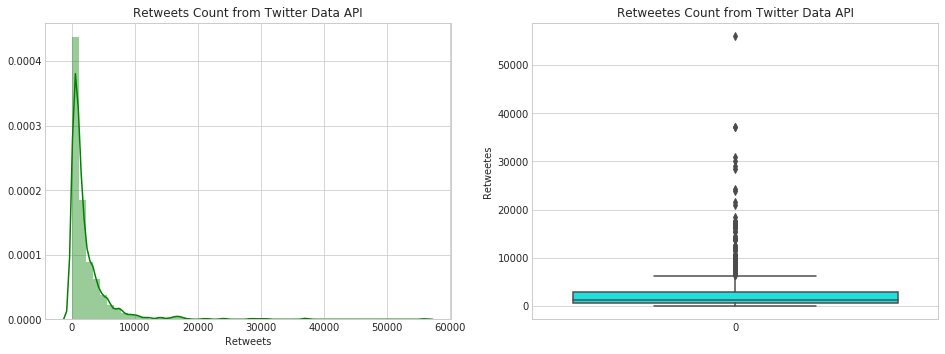

In [132]:
# figure size
# https://seaborn.pydata.org/generated/seaborn.distplot.html
# https://www.drawingfromdata.com/setting-figure-size-using-seaborn-and-matplotlib

plt.figure(figsize=(16,12))

# This is the first subplot of the figure 
plt.subplot(221)
sns.distplot(df['retweets'], color="green")
plt.title('Retweets Count from Twitter Data API')
plt.xlabel('Retweets')

# This is the second subplot of the figure 
plt.subplot(222)
sns.boxplot(data=df['retweets'], color='cyan')
plt.title('Retweetes Count from Twitter Data API')
plt.ylabel('Retweetes')

plt.show()

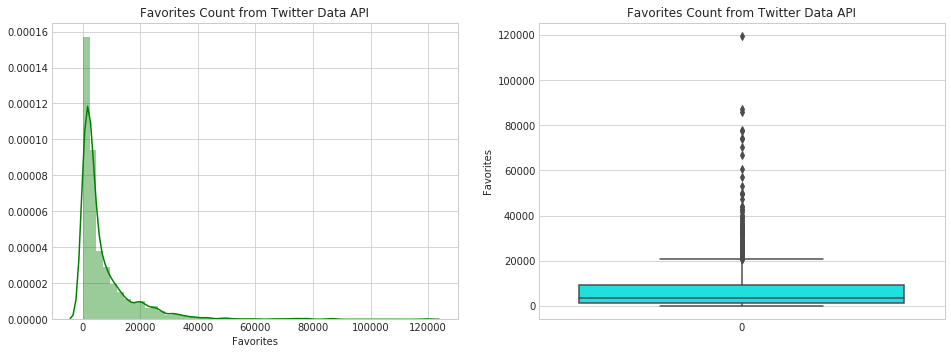

In [133]:
# figure size
plt.figure(figsize=(16,12))

# This is the first subplot of the figure 
plt.subplot(221)
sns.distplot(df['favorites'], color="green")
plt.title('Favorites Count from Twitter Data API')
plt.xlabel('Favorites')

# This is the second subplot of the figure 
plt.subplot(222)
sns.boxplot(
    data=df['favorites'],
    color='cyan')

plt.title('Favorites Count from Twitter Data API')
plt.ylabel('Favorites')
plt.show()

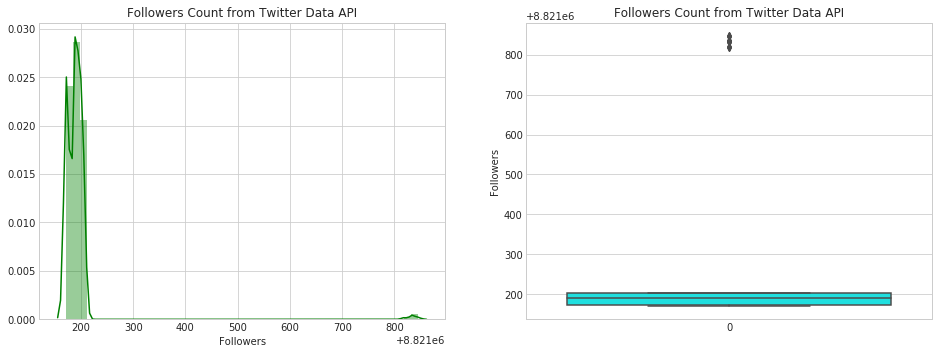

In [134]:
# figure size
plt.figure(figsize=(16,12))

# This is the first subplot of the figure 
plt.subplot(221)
sns.distplot(df['followers'], color="green")
plt.title('Followers Count from Twitter Data API')
plt.xlabel('Followers')

# This is the second subplot of the figure 
plt.subplot(222)
sns.boxplot(
    data=df['followers'],
    color='cyan')

plt.title('Followers Count from Twitter Data API')
plt.ylabel('Followers')
plt.show()

- Purpose of the above graph we just walk through visually `retweets`, `favorites`, and `followers` how our data look like.
- It seems `retweets` and `favorites` are corrleated with each other

### Let's see the corrleation between retweets and favoirtes counts.

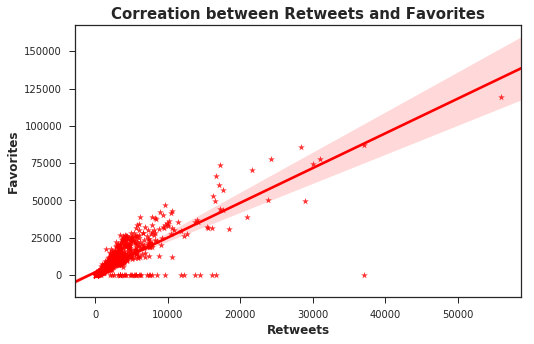

In [146]:
# Regression plot
# https://seaborn.pydata.org/generated/seaborn.regplot.html
plt.figure(figsize=(8,5))
sns_plot = sns.regplot(x="retweets", y="favorites", data=df[['retweets', 'favorites']], color='red', marker='*');
plt.xlabel("Retweets", fontweight='bold', fontsize=12)
plt.ylabel("Favorites", fontweight='bold', fontsize=12)
plt.title("Correation between Retweets and Favorites", fontweight='bold', fontsize=15)
plt.show()
sns_plot = sns_plot.get_figure()
sns_plot.savefig("regplot.png")

Above graph show positive corrleation between retweets and favorites counts of dogs

### Most frequently predicted Dog breeds in algorithms 

In [137]:
dog_breeds_p1 = df.p1.value_counts().sort_values(ascending=False).head(10).index
dog_breeds_p2 = df.p2.value_counts().sort_values(ascending=False).head(10).index
dog_breeds_p3 = df.p3.value_counts().sort_values(ascending=False).head(10).index

In [138]:
dog_breeds_p1_counts = []
for i in df.p1.value_counts().sort_values(ascending=False).head(10):
    dog_breeds_p1_counts.append(i)
    
dog_breeds_p2_counts = []
for i in df.p2.value_counts().sort_values(ascending=False).head(10):
    dog_breeds_p2_counts.append(i)
    
dog_breeds_p3_counts = []
for i in df.p3.value_counts().sort_values(ascending=False).head(10):
    dog_breeds_p3_counts.append(i)

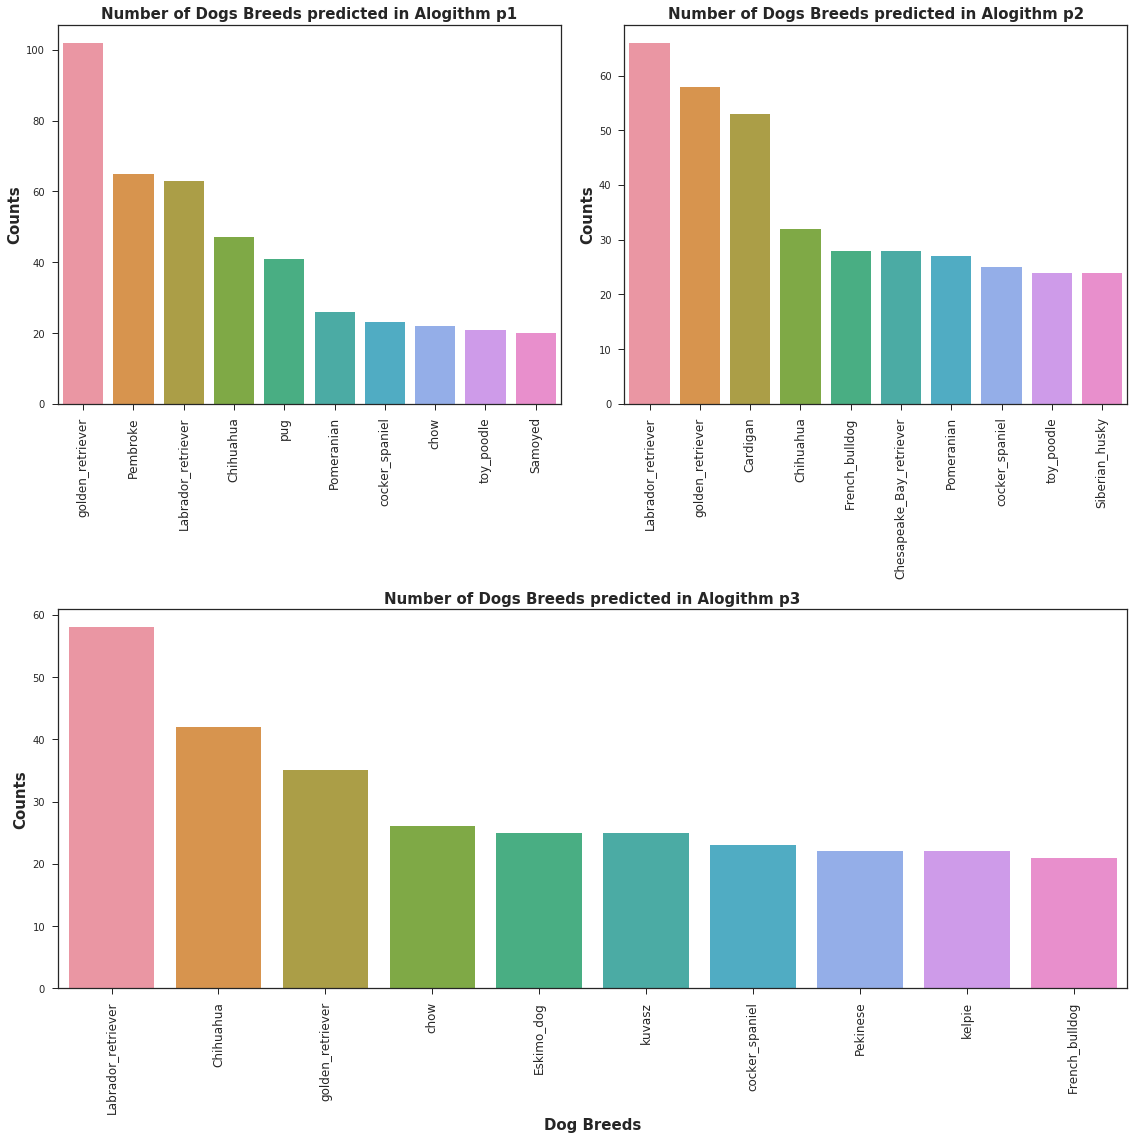

In [148]:
# https://stackoverflow.com/questions/37799865/valueerror-num-must-be-1-num-2-not-3
# dog_breeds_p1

# figure size
plt.figure(figsize=(16,16))

# This is the first subplot of the figure 
plt.subplot(221)
sns.set(style="ticks", color_codes=True)
sns.barplot(x=dog_breeds_p1, y=dog_breeds_p1_counts)
# plt.suptitle('The algorithms #1, #2, #3 prediction for the image in the tweet', fontsize=20)
plt.xticks(rotation=90, fontsize=12)
# plt.xlabel("Dog Breeds", fontsize=13)
plt.ylabel("Counts", fontweight='bold', fontsize=15)
plt.title("Number of Dogs Breeds predicted in Alogithm p1", fontweight="bold", fontsize=15)

plt.subplot(222)
sns.set(style="ticks", color_codes=True)
sns.barplot(x=dog_breeds_p2, y=dog_breeds_p2_counts)
plt.xticks(rotation=90, fontsize=12)
# plt.xlabel("Dog Breeds", fontsize=13)
plt.ylabel("Counts", fontweight='bold', fontsize=15)
plt.title("Number of Dogs Breeds predicted in Alogithm p2", fontweight="bold", fontsize=15)

plt.subplot(212)
sns.set(style="ticks", color_codes=True)
sns.barplot(x=dog_breeds_p3, y=dog_breeds_p3_counts)
plt.xticks(rotation=90, fontsize=12)
plt.xlabel("Dog Breeds", fontweight='bold',fontsize=15)
plt.ylabel("Counts", fontweight='bold', fontsize=15)
plt.title("Number of Dogs Breeds predicted in Alogithm p3", fontweight="bold", fontsize=15)
plt.tight_layout()

Above result showing little bit variation in order but the average frequent dog breeds predicted in the algorithms are `Labrador_retriver, Golden_retriver,` and `Chichuhua`.

### Most common rating of numerator

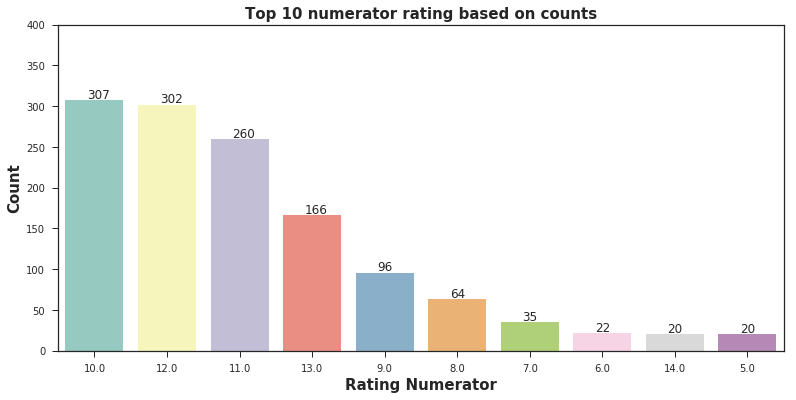

In [140]:
# https://stackoverflow.com/questions/33179122/seaborn-countplot-with-frequencies
# Top 10 numerator rating based on counts
plt.figure()
ax = plt.subplots(figsize=(13,6))
sns.set(style="ticks", color_codes=True)
# data_sns = df.rating_numerator.value_counts().head(10)
ax = sns.countplot(x = df.rating_numerator, data = df, order=df.rating_numerator.value_counts().head(10).iloc[:10].index, palette = "Set3")

ax.set_ylim(0, 400)
# https://stackoverflow.com/questions/33179122/seaborn-countplot-with-frequencies
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+2))

plt.xlabel('Rating Numerator', fontweight='bold', fontsize=15)
plt.ylabel('Count', fontweight='bold', fontsize=15)
plt.title('Top 10 numerator rating based on counts', fontweight='bold', fontsize=15);

The number of most common `rating_numerator` is **10.0,12.0,11.0,13.0** as we wanted as 13/10 before the cleaning the data

### Most common rating of denominator

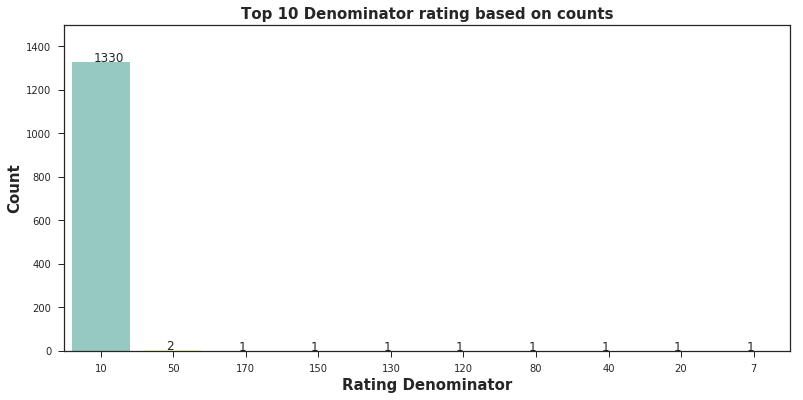

In [141]:
plt.figure()
ax = plt.subplots(figsize=(13,6))
sns.set(style="ticks", color_codes=True)
# data_sns = df.rating_numerator.value_counts().head(10)
ax = sns.countplot(x = df.rating_denominator, data = df, order=df.rating_denominator.value_counts().head(10).iloc[:10].index, palette = "Set3")

ax.set_ylim(0, 1500)
# https://stackoverflow.com/questions/33179122/seaborn-countplot-with-frequencies
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+2))

plt.xlabel('Rating Denominator', fontweight='bold', fontsize=15)
plt.ylabel('Count', fontweight='bold', fontsize=15)
plt.title('Top 10 Denominator rating based on counts', fontweight='bold', fontsize=15);

The most frequent rating of `rating_denominator` is 10

### Highest Dog Names Count 

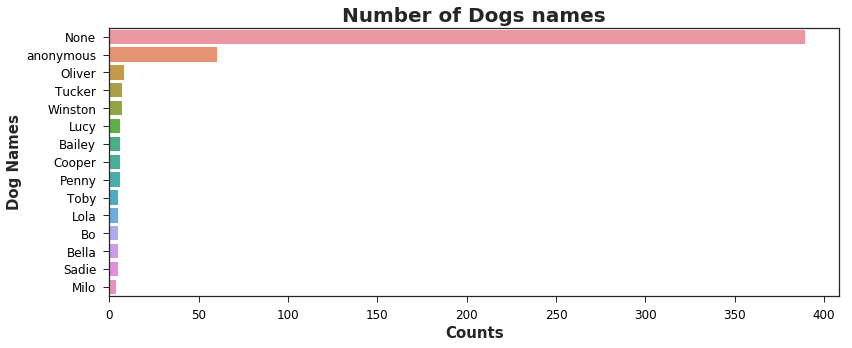

In [142]:
plt.figure(figsize=(12,5))
ax = plt.subplot()
data = df.name.value_counts().head(15)
sns.barplot(y=data.index, x=data.values)

plt.xticks(rotation=0, fontsize=12, color='black')
plt.xlabel('Counts', fontsize=15, fontweight='bold')
plt.yticks(rotation=0, fontsize=12, color='black')
plt.ylabel('Dog Names', fontsize=15, fontweight='bold')
plt.title("Number of Dogs names", fontweight="bold", fontsize=20)
plt.tight_layout()
plt.show()

Most of the dogs names have `None` those are most in dataset.

### Similarly, most common dog stages

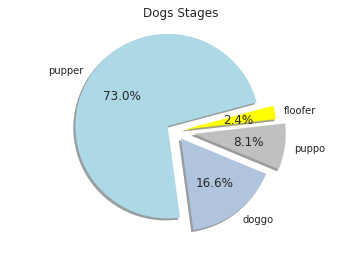

In [143]:
# https://datatofish.com/pie-chart-matplotlib/
dog_stages = df.dog_stages.value_counts().index
dog_stages_counts = df.dog_stages.value_counts().loc[dog_stages].values
my_colors = ['lightblue','lightsteelblue','silver', 'yellow']
my_explode = (0.1, 0.1, 0.2, 0.1)

plt.pie(dog_stages_counts, labels=dog_stages, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Dogs Stages')
plt.axis('equal')
plt.show()

The most common `dog_stages` is pupper then doggo, puppo and floofer

### Dog Stages Varation in each alogrithms 

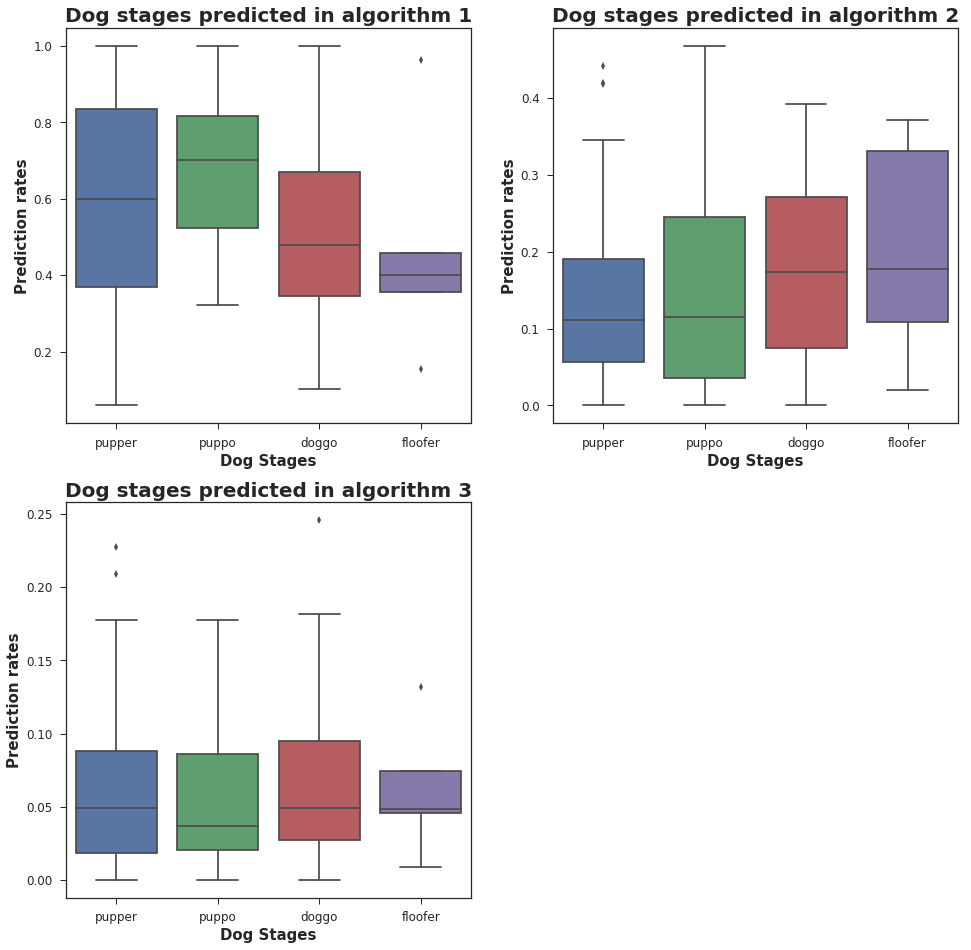

In [149]:
# https://seaborn.pydata.org/tutorial/aesthetics.html#seaborn-figure-styles
# Dog stage predicted in first algorithm
plt.figure(figsize=(16,16))
plt.subplot(221)
sns.boxplot(data=df, y='p1_conf', x='dog_stages')
plt.title('Dog stages predicted in algorithm 1', fontweight='bold', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Dog Stages', fontweight='bold', fontsize=15)
plt.ylabel('Prediction rates', fontweight='bold', fontsize=15)

# Dog stage predicted in second algorithm
plt.subplot(222)
sns.boxplot(data=df, y='p2_conf', x='dog_stages')
plt.title('Dog stages predicted in algorithm 2', fontweight='bold', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Dog Stages', fontweight='bold', fontsize=15)
plt.ylabel('Prediction rates', fontweight='bold', fontsize=15)

# Dog stage predicted in third algorithm
plt.subplot(223)
sns.boxplot(data=df, y='p3_conf', x='dog_stages')
plt.title('Dog stages predicted in algorithm 3', fontweight='bold', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Dog Stages', fontweight='bold', fontsize=15)
plt.ylabel('Prediction rates', fontweight='bold', fontsize=15);

Above, you can see the variation for each `dog stages`in each the algorithm.

## Conclusion:
- In this project, we have gone through all process of data wrangling Garthering data through twitter api, programmatically download files, and reading csv files from pandas.
- Then we are assessing data through visually and programmatically, afterwards we performed cleaning operation using vairous pandas commands. Finally, we merge all datasets into one.
- Export `twitter_archive_master.csv`. Then, Analysze and Visualize data through matplotlib and seaborn liberary 
